SGDRegressor y SGDClassifier usando sklearn
====

* *30 min* | Última modificación: Marzo 20, 2020

## SGDRegressor

Este es un modelo lineal de la forma:

$$y = w_0 + \sum_i w_i x_i$$

con las siguientes características:


* Los parámetros son estimados usando el gradiente descendente estocástico computado sobre cada muestra del patrón de entrenamiento.


* Permite usar diferentes funciones de pérdida:

  -  `squared_loss`: $$L(d, y) = (d - y)^2$$
  
  - `huber`: $$L(d, y)=
\begin{cases}
\frac{1}{2}[d - y]^2 & \text{Si } |d-y| \le \epsilon \\
\\
\epsilon |d-y|-\frac{1}{2}\epsilon^2 & \text{en cualquier otro caso}
\end{cases}
$$ 

  - `epsilon_insensitive`: $$L(d, y)=
\begin{cases}
0 & \text{Si } |d-y| \le \epsilon \\
\\
\epsilon |d-y| - \epsilon & \text{en cualquier otro caso}
\end{cases}
$$ 
  
  - `squared_epsilon_insensitive`: $$L(d, y)= [\text{epsilon_insensitive}(d, y)]^2$$ 
  
  
* Se pueden especificar diferentes funciones de penalización (ridge, LASSO o ElasticNet).


* El intercepto del modelo ($w_0$) puede ser eliminado del modelo.


* Pueden especificarse diferentes esquemas para la tasa de aprendizaje (constante, optima, escala inversa, adaptativa).


* El algoritmo de entreamiento puede usar Early Stopping para finalizar el proceso de optimización.


* El modelo puede usar los parametros computados sobre el último patrón o como un promedio.

A continuación se ejemplifica el uso de `SGDRegressor` para realizar una regressión lineal.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

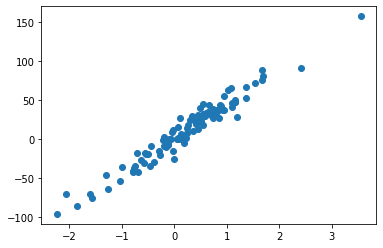

In [2]:
#
#  Generación de datos artificiales
#

from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=100,         #
    n_features=1,          #
    n_informative=1,       #
    bias=0.0,              # intercepto
    effective_rank=None,   # numero de vectores singulares para explicar los datos
    tail_strength=0.9,     # ? importancia relativa de las colas
    noise=10.0,            #
    shuffle=False,         # ?
    coef=False,            # ?coeficientes de la regresion 
    random_state=12356)    #

plt.scatter(X, y);


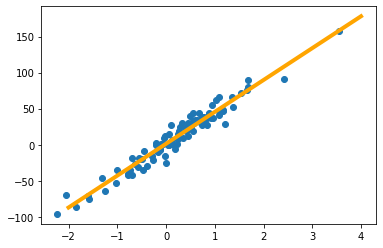

In [3]:
#
# Uso de SGDRegressor
#

from sklearn.linear_model import SGDRegressor

#
# Crea el modelo y su parametrización
#
sgdRegressor = SGDRegressor(
    loss='squared_loss',         # 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2', 'l1', 'elasticnet'
    alpha=0.0001,                # factor regularización
    l1_ratio=0.15,               # ElasticNet
    fit_intercept=True,          #
    max_iter=1000,               #
    tol=0.001,                   # 
    shuffle=True,                # ?datos de entrenamiento
    verbose=0,                   #
    epsilon=0.1,                 # epsilon-insensitive loss function
    random_state=None,           #
    learning_rate='invscaling',  # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.01,                   # leaning_rate = constant
    power_t=0.25,                # inverse scaling learning rate
    early_stopping=False,        #
    validation_fraction=0.1,     #
    n_iter_no_change=5,          #
    warm_start=False,            #
    average=False)               # average weights

#
# Entrenamiento del modelo
#
sgdRegressor.fit(X, y)

# 
# Grafico de la muestra para entrenamiento
#
plt.scatter(X, y)

#
# Gráfico del pronóstico usando SGDRegressor
#
X_pred = np.linspace(start=-2, stop=4, num=50)
X_pred = [[x] for x in X_pred]
y_pred = sgdRegressor.predict(X_pred)
plt.plot(X_pred, y_pred, '-', linewidth = 4, color='orange');

In [4]:
sgdRegressor.coef_

array([44.19702465])

In [5]:
sgdRegressor.intercept_

array([1.32086051])

## SGDClassifier

Permite estimar un clasificador lineal con las siguientes características (se usa +/- 1 para representar las clases):


* Los parámetros son estimados usando el gradiente descendente estocástico computado sobre cada muestra del patrón de entrenamiento.


* Permite usar diferentes funciones de pérdida:

  - `hinge`: $$L(d,y)=\max (0, 1 - d \times y)$$

  - `log`: (logistica) $$L(d, y) = -d \log (y) - (1-d) \log(1 - y)$$
  
  - `modified_huber`: $$L(d, y)=
\begin{cases}
\max(0, 1 - d \times y) & \text{Si } $d \times y \ge -1$ \\
\\
-4 \times d \times y & \text{en cualquier otro caso}
\end{cases}
$$ 

  - `squared hinge`: $$L(d,y)=[\max (0, 1 - d \times y)]^2$$ 
  
  - `perceptron`: $$L(d, y)= d - y$$ 
    
  - Cualquiera de las funciones usandas con `SGDRegressor`.
  
  
* Se pueden especificar diferentes funciones de penalización (ridge, LASSO o ElasticNet).


* El intercepto del modelo ($w_0$) puede ser eliminado del modelo.


* Pueden especificarse diferentes esquemas para la tasa de aprendizaje (constante, optima, escala inversa, adaptativa).


* El algoritmo de entreamiento puede usar Early Stopping para finalizar el proceso de optimización.


* El modelo puede usar los parametros computados sobre el último patrón o como un promedio.

A continuación se ejemplifica el uso de `SGDClassifier` para construir un classificador lineal.

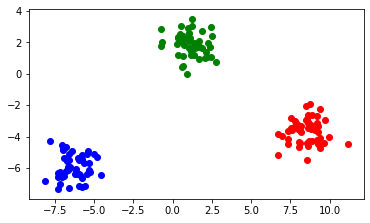

In [6]:
#
#  Generación de datos artificiales
#

from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS, 
    n_features=2,
    centers=3,
    cluster_std=0.8, 
    shuffle=False,  
    random_state=12345)

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

In [7]:
from sklearn.linear_model import SGDClassifier

#
# Crea el modelo y su parametrización
#
sgdClassifier = SGDClassifier(
    loss='hinge',                # 'hinge', 'log', 'modified_huber', 'squared_hinge', 
                                 # 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 
                                 # 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2', 'l1', or 'elasticnet'
    alpha=0.0001,                # regularization
    l1_ratio=0.15,               # Elastic Net
    fit_intercept=True,          #
    max_iter=1000,               #
    tol=0.001,                   #
    shuffle=True,                # ?shuffle training data after each epoch
    verbose=0,                   #
    epsilon=0.1,                 # epsilon insensitive loss function
    random_state=None,           #
    learning_rate='optimal',     # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.0,                    #
    power_t=0.5,                 # eta = eta0 / pow(t, power_t) para 'invscaling'
    early_stopping=False,        # 
    validation_fraction=0.1,     # para early_stopping
    n_iter_no_change=5,          #
    class_weight=None,           # 
    warm_start=False,            # ?reusa solución previa
    average=False)               # 

#
# Estimación de los parámetros óptimos
#
sgdClassifier.fit(X, d)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgdClassifier.coef_

array([[ 23.19819684, -12.85266256],
       [ -2.85611246,  -2.20249112],
       [ -3.10519567,  50.23539299]])

In [9]:
sgdClassifier.intercept_

array([-140.15290237,  -10.        ,   18.38237593])

In [10]:
sgdClassifier.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

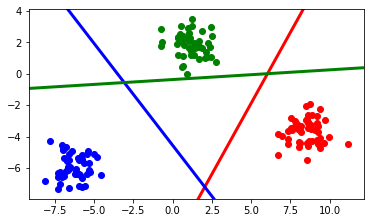

In [11]:
#
# Gráfica de las fronteras de decisión
#

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraA = (- sgdClassifier.intercept_[0] / sgdClassifier.coef_[0][1] 
             - sgdClassifier.coef_[0][0] / sgdClassifier.coef_[0][1] * xplot)

fronteraB = (- sgdClassifier.intercept_[1] / sgdClassifier.coef_[1][1] 
             - sgdClassifier.coef_[1][0] / sgdClassifier.coef_[1][1] * xplot)

fronteraC = (- sgdClassifier.intercept_[2] / sgdClassifier.coef_[2][1] 
             - sgdClassifier.coef_[2][0] / sgdClassifier.coef_[2][1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim);

**Ejercicio.---** ¿Cómo se modifican las fronteras de decisión cuando se usa la función de pérdida de la regresión logística?